## Описание проекта

Я — аналитик крупного интернет-магазина. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.

**Цель:** Приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

### Описание данных

**Данные для первой части**
Файл `/datasets/hypothesis.csv`:
* `Hypothesis` — краткое описание гипотезы;
* `Reach` — охват пользователей по 10-балльной шкале;
* `Impact` — влияние на пользователей по 10-балльной шкале;
* `Confidence` — уверенность в гипотезе по 10-балльной шкале;
* `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**Данные для второй части**
Файл `/datasets/orders.csv`
* `transactionId` — идентификатор заказа;
* `visitorId` — идентификатор пользователя, совершившего заказ;
* `date` — дата, когда был совершён заказ;
* `revenue` — выручка заказа;
* `group` — группа A/B-теста, в которую попал заказ.

Файл `/datasets/visitors.csv`
* `date` — дата;
* `group` — группа A/B-теста;
* `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста  

## Оглавление:

1. [Часть 1. Приоритизация гипотез](#step1)  
2. [Часть 2. Анализ A/B-теста](#step2)
3. [Общий вывод и решение по результатам теста](#step3)

# Часть 1. Приоритизация гипотез <a id="step1"></a>

In [2]:
import pandas as pd    #  импорт библиотек 
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [3]:
dt = pd.read_csv('/datasets/hypothesis.csv')    #  прочтение файла
pd.set_option('display.max_colwidth', 150)
dt

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


В файле 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами `Reach`, `Impact`, `Confidence`, `Effort`. 

Для упрощения дальнейшей работы, приведем названия столбцов к нижнему регистру:

In [4]:
dt.columns = dt.columns.str.lower()
dt.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

**1) Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.**

In [7]:
dt['ICE'] = round(dt['impact'] * dt['confidence'] / dt['efforts']).astype('int')
dt = dt.sort_values(by='ICE', ascending=False)
dt

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1


***Вывод:***

Наиболее перспективные гипотезы по **ICE** - 8, 0, 7.

**2) Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.**

In [9]:
dt['RICE'] = (dt['reach'] * dt['impact'] * dt['confidence'] / dt['efforts']).astype('int')
dt = dt.sort_values(by='RICE', ascending=False)
dt

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11,112
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7,56
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13,40
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8,40
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16,16
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1,9
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2,4
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1,4
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1,3


***Вывод:***

А вот по **RICE** наиболее перспективными оказались гипотезы 7, 2, 0, 6. Гипотеза номер 8 в топ не вошла. Приоритизация гипотез изменилась благодаря учету параметра `reach`, который показывает, скольких пользователей затронет изменение, которое мы хотим внести. Неудивительно, что седьмая гипотеза оказалась на первом месте - оценка `reach` у нее самая высокая - 10 баллов, в то время, как у восьмой гипотезы всего 1 балл.

# Часть 2. Анализ A/B-теста  <a id="step2"></a>

Мы провели A/B-тест и получили результаты, которые описаны в файлах `/datasets/orders.csv` и `/datasets/visitors.csv`.

In [10]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')
display(orders.head(10), visitors.head(10))

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [70]:
print('Количество дубликатов в таблице orders:', orders.duplicated().sum())
print('Количество дубликатов в таблице visitors:', visitors.duplicated().sum())

Количество дубликатов в таблице orders: 0
Количество дубликатов в таблице visitors: 0


Проанализируем A/B-тест:

**1) Построим график кумулятивной выручки по группам**

Чтобы построить графики, нужно собрать кумулятивные данные. Объявим датафрейм `cumulativeData` со столбцами:
* `date` — дата;
* `group` — группа A/B-теста (A или B);
* `orders` — кумулятивное количество заказов на указанную дату в указанной группе;
* `buyers` — кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;
* `revenue` — кумулятивная выручка на указанную дату в указанной группе (средний чек);
* `visitors` — кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.

Создадим массив уникальных пар значений дат и групп теста методом `drop_duplicates():`

In [71]:
datesGroups = orders[['date','group']].drop_duplicates() 

Соберём агрегированные кумулятивные по дням данные о заказах:

In [93]:
# агрегируем значения, вычисляем максимальную дату; 
# для группы рассчитаем максимум, найдём число уникальных ID заказов и пользователей
# подсчитаем сумму средних чеков
ordersAggregated = (datesGroups
                    .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 
      'group' : 'max', 
      'transactionId' : 'nunique', 
      'visitorId' : 'nunique', 
      'revenue' : 'sum'}), axis=1)
                    .sort_values(by=['date','group']))

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitorsAggregated = (datesGroups
                      .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
                             .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
                      .sort_values(by=['date','group']))

# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Построим графики кумулятивной выручки по дням и группам A/B-тестирования:

Text(0, 0.5, 'Кумулятивная выручка')

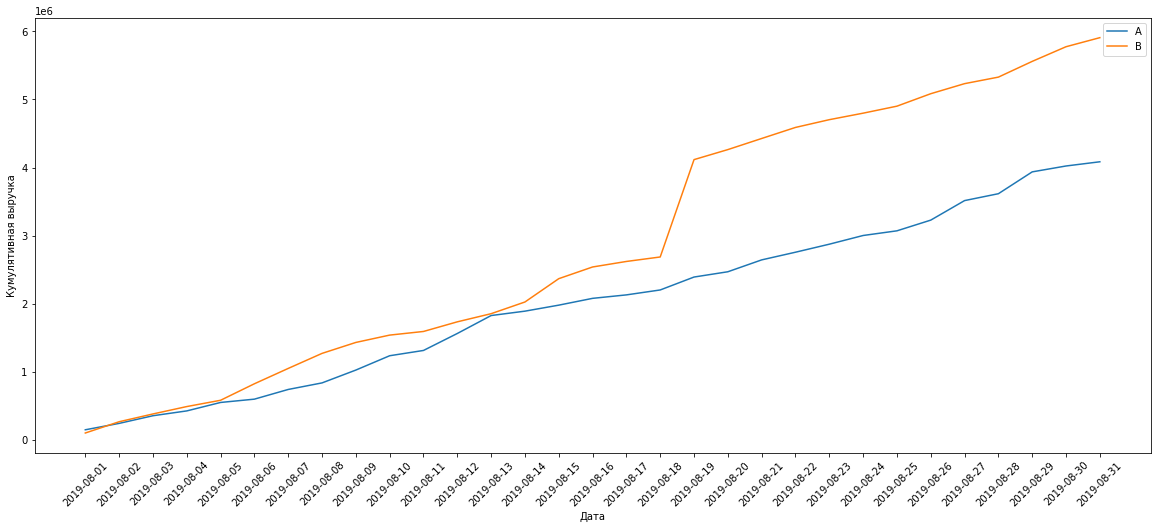

In [94]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(20, 8))
plt.xticks(rotation = 45)
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend() 

plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка')

***Вывод:***

Выручка почти равномерно увеличивается в течение всего теста. Хороший знак.

Однако на графике выручки группы **В** можно наблюдать резкое изменение в нескольких точках. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

**2) Построим график кумулятивного среднего чека по группам**

Text(0, 0.5, 'Кумулятивный средний чек')

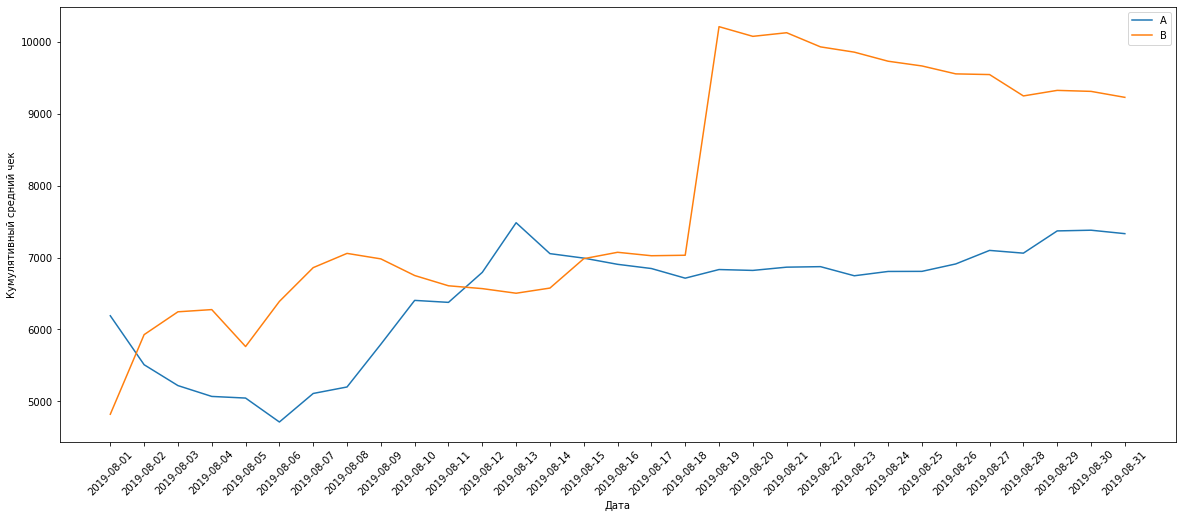

In [95]:
plt.figure(figsize=(20, 8))
plt.xticks(rotation = 45)
# разделим кумулятивную выручку на кумулятивное число заказов
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()

plt.xlabel('Дата')
plt.ylabel('Кумулятивный средний чек')

***Вывод:***

Средний чек становится равномерным ближе к концу теста, но продолжает падать для обеих групп. 

Возможно, в группу B попали крупные заказы (резкий всплеск на графике). Тогда ей нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

**3) Построим график относительного изменения кумулятивного среднего чека группы B к группе A**

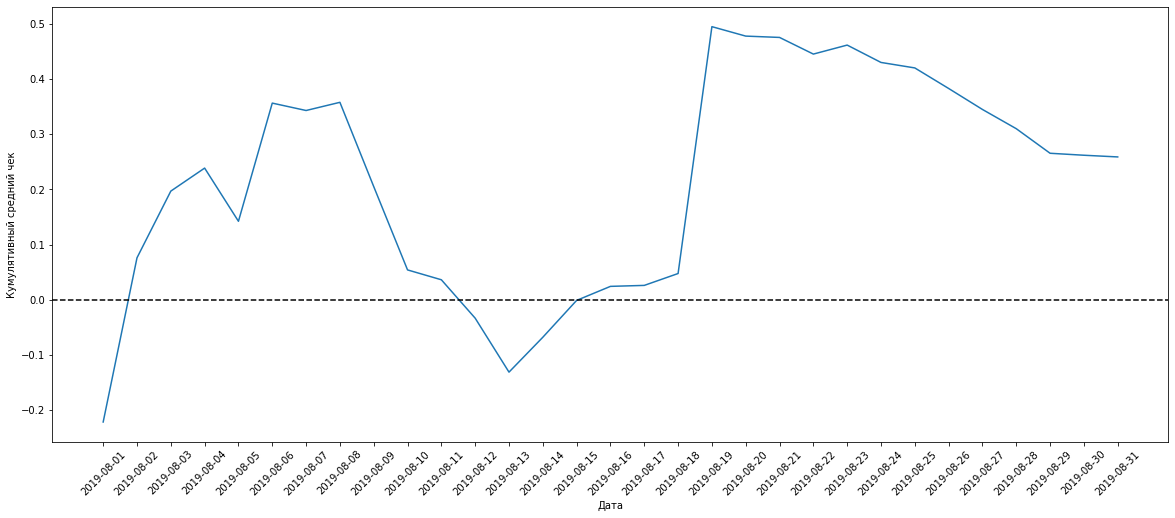

In [96]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(20, 8))
plt.xticks(rotation = 45)

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.xlabel('Дата')
plt.ylabel('Кумулятивный средний чек')

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

***Вывод:***

В нескольких точках график различия между сегментами резко «скачет». Похоже, дело действительно в крупных заказах.

**4) Построим график кумулятивной конверсии по группам**

(0.0, 30.0, 0.028, 0.037)

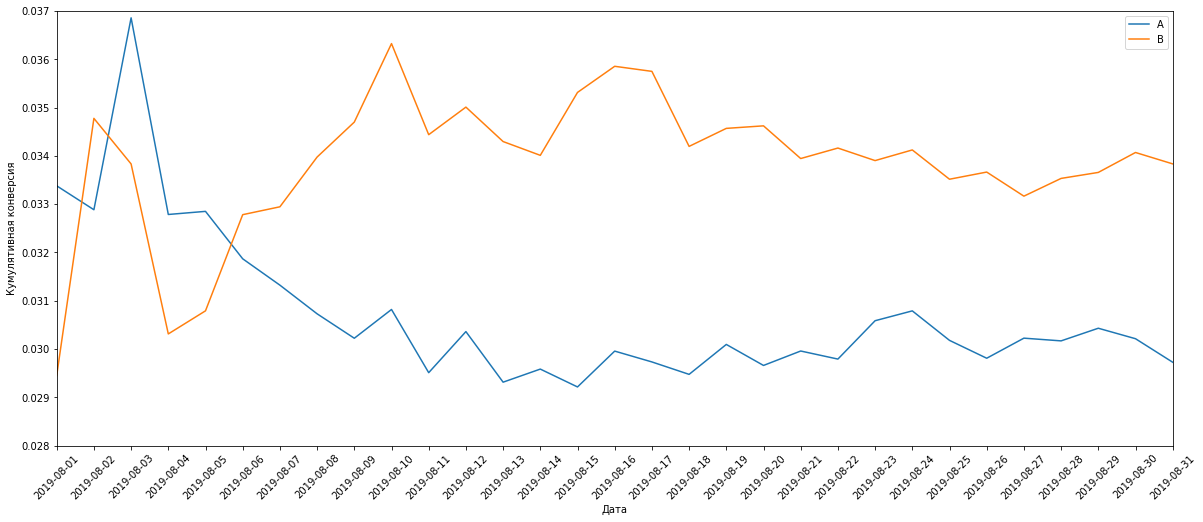

In [97]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(20, 8))
plt.xticks(rotation = 45)
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

plt.xlabel('Дата')
plt.ylabel('Кумулятивная конверсия')

# задаем масштаб осей
plt.axis(["2019-08-01", '2019-08-31', 0.028, 0.037])

***Вывод:***

Группа **В** сильно вырвалась вперед, однако к концу эксперимента конверсия обеих групп снижается.

**5) Построим график относительного изменения кумулятивной конверсии группы B к группе A**

Text(0, 0.5, 'Кумулятивная конверсия')

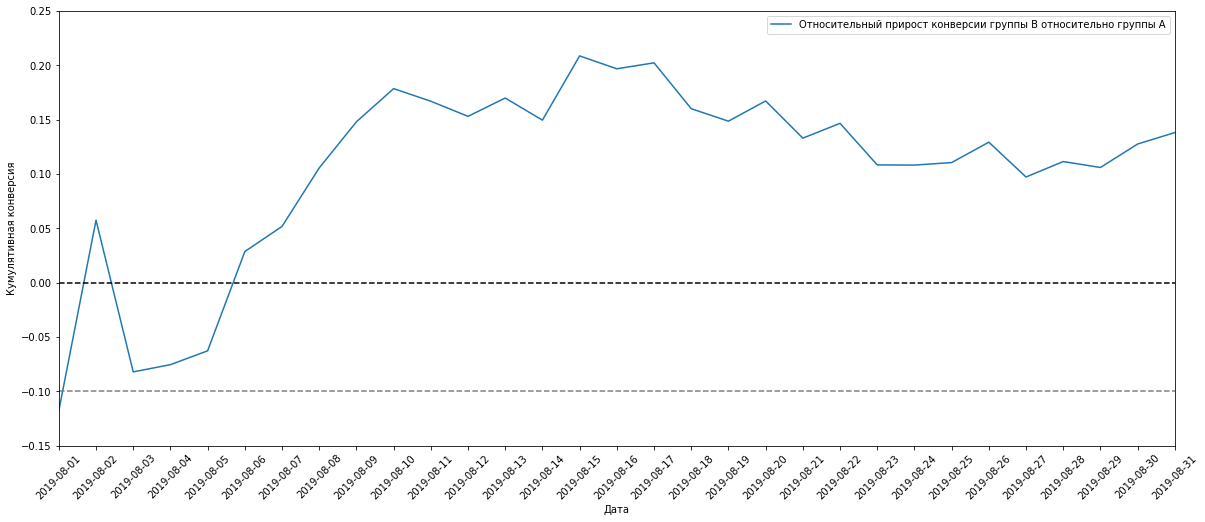

In [98]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(20, 8))
plt.xticks(rotation = 45)
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.15, 0.25])
plt.xlabel('Дата')
plt.ylabel('Кумулятивная конверсия')

***Вывод:***

В начале теста группа B проигрывала группе A, но в конечном итоге сильно вырвалась вперед.

**6) Построим точечный график количества заказов по пользователям**

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


Text(0, 0.5, 'Количество заказов')

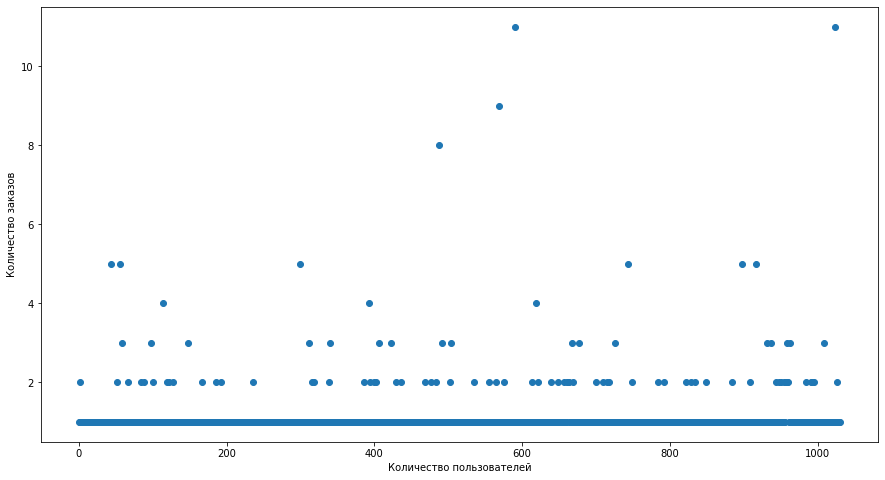

In [101]:
#  считаем количество заказов по пользователям
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']

display(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

# строим график
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(15, 8))
plt.scatter(x_values, ordersByUsers['orders'])

plt.xlabel('Количество пользователей')
plt.ylabel('Количество заказов')

***Вывод:***

Большинство покупателей заказывали только один раз. Однако пользователей с 2-3 заказами тоже достаточно много.

**7) Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.**

In [102]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


***Вывод:***

Не более 5% пользователей оформляли больше чем 2 заказа. И 1% более 4-х. Выберем 4 заказа на одного пользователя за нижнюю границу числа заказов, и отсеем аномальных пользователей по ней. 

**8) Построим точечный график стоимостей заказов**

Text(0, 0.5, 'Стоимость заказов')

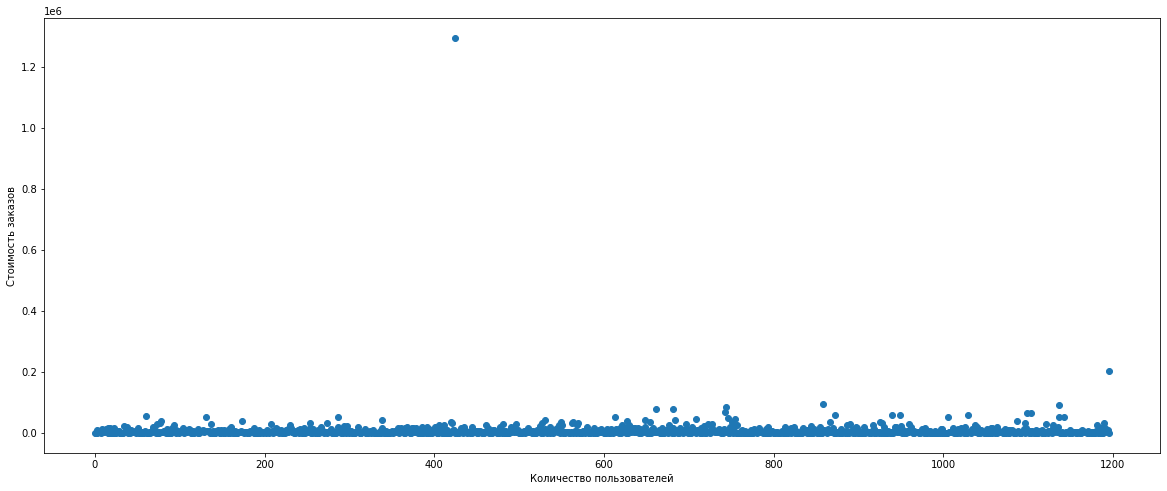

In [105]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(20, 8))
plt.scatter(x_values, orders['revenue'])

plt.xlabel('Количество пользователей')
plt.ylabel('Стоимость заказов')

***Вывод:***

Дорогих заказов немного.

**9) Посчитаим 95-й и 99-й перцентили стоимости заказов**

In [106]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


***Вывод:***

Не более 5% заказов дороже 28 000. И не более 1% дороже 58 234. Выберем за нижнюю границу сумму заказа в 58233, и отсеем аномальные заказы по ней.

**10) Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным**

Сформулируем гипотезы:

Н0: Статистически значимых различий в конверсии между группами нет.

Н1: Статистически значимые различия в конверсии между группами есть.

Начнем с подготовки данных:

In [114]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Создадим переменные `ordersByUsersA` и `ordersByUsersB` со столбцами `userId` и `orders`. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [115]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

Объявим переменные `sampleA` и `sampleB`, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули.

In [116]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

Выведем относительный прирост конверсии группы B: 

In [117]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))


0.017
0.138


***Вывод:***

По «сырым» данным есть различия в конверсии групп A и B.
 
Первое число — `p-value` = 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. К тому же, относительный выигрыш группы B равен 13.8% — второе число в выводе.

**11) Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным**

Сформулируем гипотезы:

Н0: Статистически значимых различий в среднем чеке между группами нет.

Н1: Статистически значимые различия в среднем чеке между группами есть.


In [ ]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

***Вывод:***

`P-value` значительно больше 0.05. Значит, отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, не будем. Средний чек группы B выше среднего чека группы A на 25,9%.

**12) Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным**

Сделаем срезы пользователей с числом заказов больше 4 — `usersWithManyOrders` и пользователей, совершивших заказы дороже 20 000 — `usersWithExpensiveOrders`. Объединим их в таблице `abnormalUsers`:

In [124]:
per1 = 4
per2 = 58233
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > per1]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > per1]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > per2]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))

1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
dtype: int64


Подготовим выборки количества заказов по пользователям по группам теста и применим статистический критерий Манна-Уитни к полученным выборкам:

In [125]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.014
0.153


***Вывод:***

Результаты по конверсии сильно не изменились, выводы остаются теми же. (результаты по сырым данным: 0.017 и 0.138)

**13) Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным**

In [126]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.851
-0.006


***Вывод:***

Разница между сегментами очень сильно изменилась. Теперь по среднему чеку группа **В** немного отстает от группы **А** (на 0,06%), хотя по сырым данным она выигрывала на все 25,9%! (результаты по сырым данным: 0.729, 0.259)

# Общий вывод и решение по результатам теста <a id="step3"></a>

* Статистически значимые различия в конверсии между группами А и В есть и в "сырых" данных, и в данных без аномалий;
* Конверсия группы В выше на 17%;
* Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
* График различия конверсии между группами сообщает, что результаты группы B лучше группы A;
* График различия среднего чека говорит о том, что на результаты группы В сильно повлияли аномалии;
* Средний чек группы В без аномалий ниже среднего чека группы А на 0,06%.

**14) Решение по результатам теста**

Так как по конверсии группы различаются, а по среднему чеку - нет, предлагаю продолжить тест.